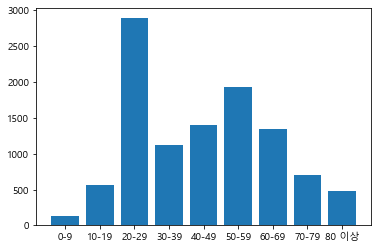

In [54]:
#pip install xmltodict
import json
import requests
import xmltodict
import pandas as pd 
import matplotlib.pyplot as plt 

# 한글문제 해결처리 
################################################################
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
################################################################

service_key ='gZ1mis9Xa%2FvXgaEyc0FxYyZ7QvEq1u5WTu4U5thsna%2Bbp3lNV0RztdYSw%2FIuvOIZkJWjETFZRUMG%2FcpQuJgHwA%3D%3D'
request_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey=' + service_key + '&pageNo=1&numOfRows=10&startCreateDt=20200310&endCreateDt=20200414&'
res = requests.get(request_url)
# res.text
xml_data = xmltodict.parse(res.text)
json_raw = json.dumps(xml_data)
json_data = json.loads(json_raw)
data = []
for item in json_data['response']['body']['items']['item']:
    data.append(item)
data
df =  pd.DataFrame(data)
df
df.columns = ['확진자', '확진률', '등록일시분초','치명률','사망자','사망률','구분','게시글번호', '수정일시분초']
df.head()
#연령별 확진자수를 나타내는그래프 '2020-04-14'
df['구분'].unique() #몇개인지확인
df.shape # 전체 데이터와 비교해보니 중복이 있는것을 확인
df['등록일자'] = pd.to_datetime(df['등록일시분초']).dt.strftime('%Y-%m-%d')
# df.groupby(by ='등록일자').count()
# df.info()
# df['구분'].head(20)
df2 = df[df['등록일자'] == '2020-04-14']
df3 = df2.iloc[:9,[6,0]]
plt.bar(df3['구분'], df3['확진자'].astype(float))
plt.show()
